# Notebook to Explore Aggregate Dataset

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append("../")
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scripts.plotting import plot_rr_intervals, plot_frequency_spectrum, plot_label_distribution, plot_pca_embedding, plot_pca_with_rr_overlay
from scripts.utils import get_project_path

## Get Processed Data

In [2]:
csv_path = get_project_path("data", "processed", "beats_dataset.csv")
df_beats = pd.read_csv(csv_path)
df_beats.head()

,record,label,rr_interval
0,100,N,0.163889
1,100,N,0.813889
2,100,N,0.811111
3,100,N,0.788889
4,100,N,0.791667


## Plot Frequency Spectrum

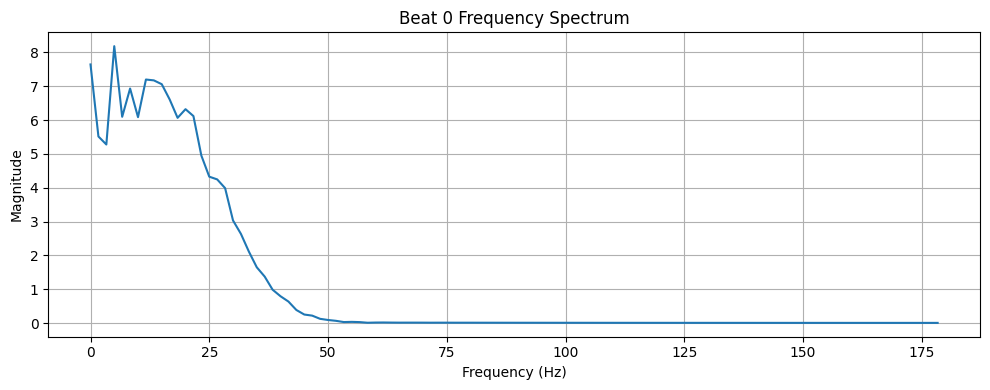

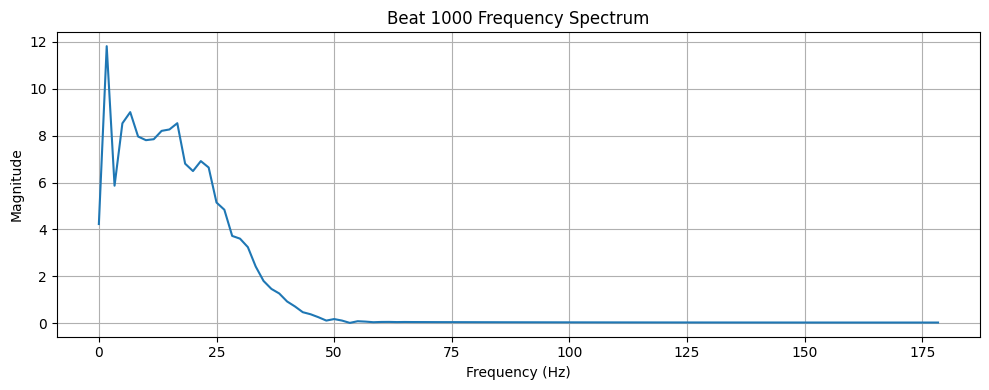

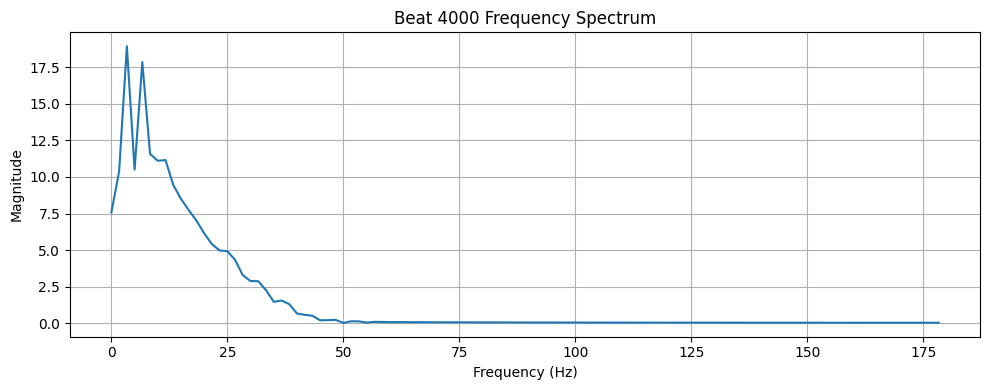

In [3]:
segments = np.load(get_project_path("data", "processed", "beat_segments.npy")) # Shape : (n_beats, window_size, channels)

for i in [0, 1000, 4000]:
    plot_frequency_spectrum(segments[i], fs = 360, title = f"Beat {i} Frequency Spectrum")

## Category Label Distribution

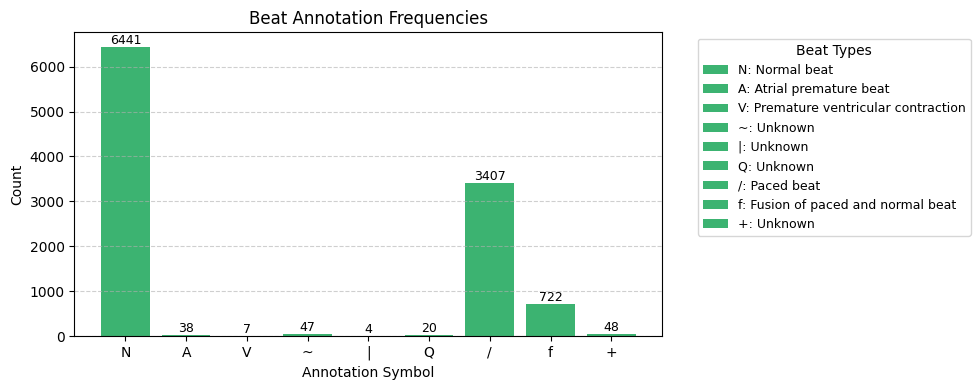

In [4]:
label_counts = Counter(df_beats["label"])

plot_label_distribution(label_counts, title = "Beat Annotation Frequencies")

## Plot RR Intervals By Category Label

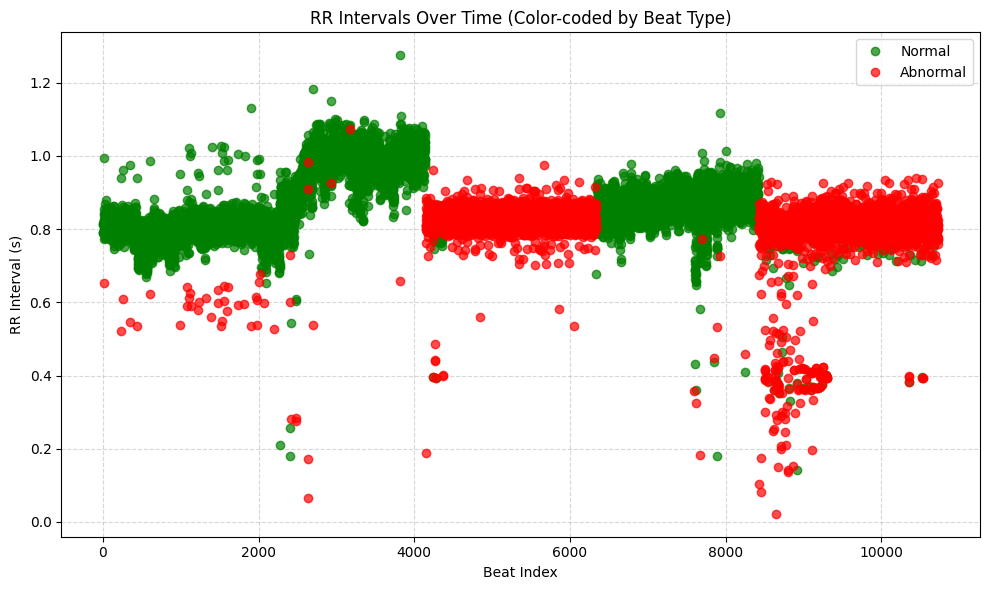

In [5]:
df_beats['type'] = df_beats['label'].apply(lambda x: "Normal" if x == "N" else "Abnormal")
rrs = df_beats["rr_interval"].values
labels = df_beats["label"].tolist()

plot_rr_intervals(rrs, labels, normal_label="N")

## PCA on Beat Shapes

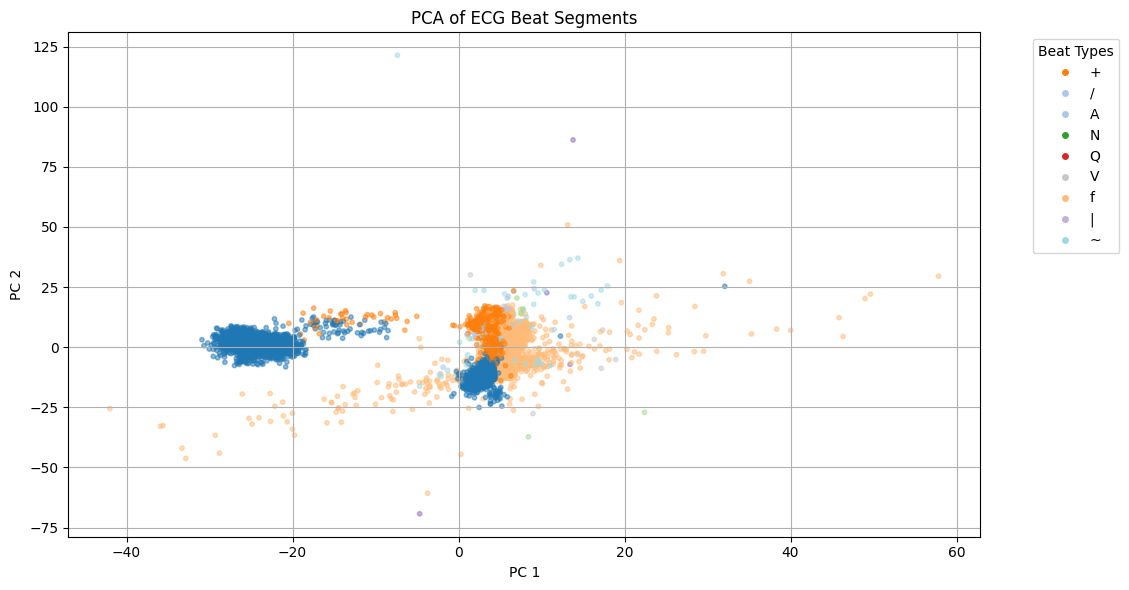

In [6]:
plot_pca_embedding(segments, labels, n_components = 2)

### Consolidate "Normal" vs. "Abnormal" grouping 

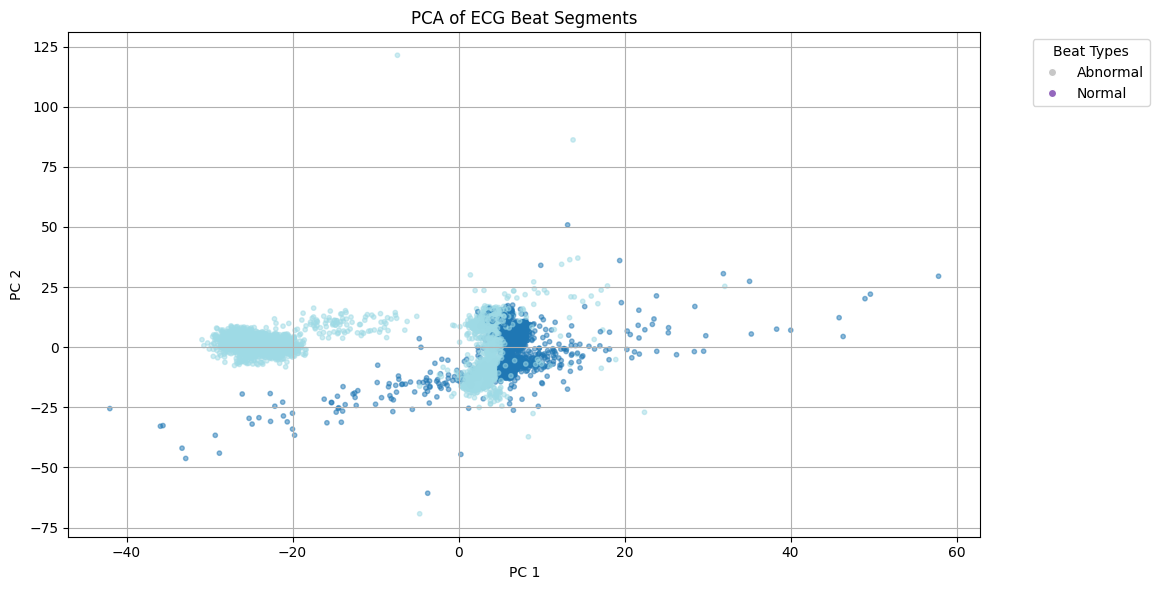

In [7]:
labels_AN = df_beats['type'].tolist()
plot_pca_embedding(segments, labels_AN)

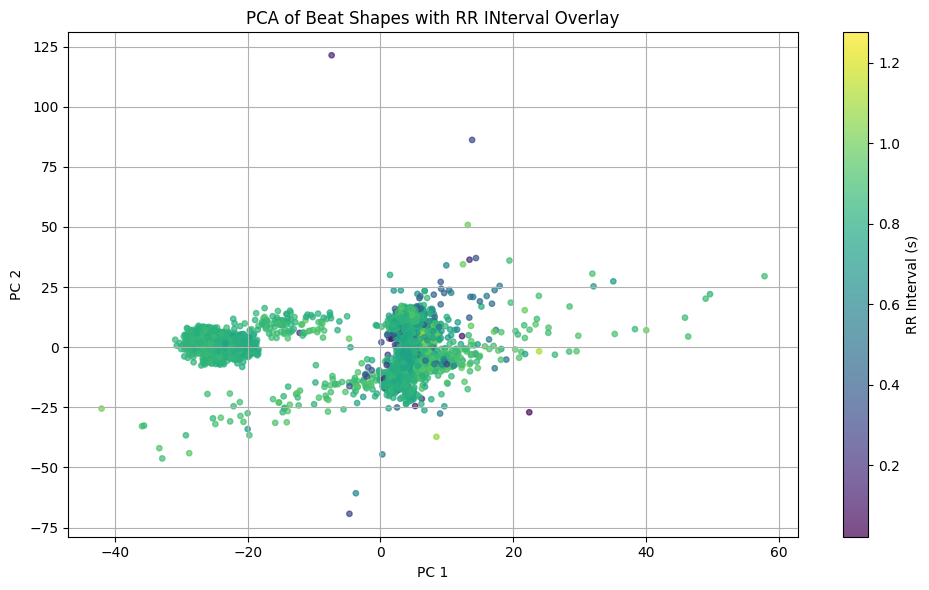

In [8]:
rr_intervals = df_beats["rr_interval"].tolist()
plot_pca_with_rr_overlay(segments, rr_intervals)

## Redefine "Normal" and "Abnormal" Categories

In [9]:
mask = df_beats["label"] != '/'
df_filtered = df_beats[mask].reset_index(drop=True)
segments_filtered = segments[mask.values]

abnormal_labels = {"A", "V", "~", "|", "Q", "+", "f"}
normal_labels = {"N", "/", "f"}
labels = df_filtered['label'].apply(lambda x: "Abnormal" if x in abnormal_labels else "Normal").tolist()


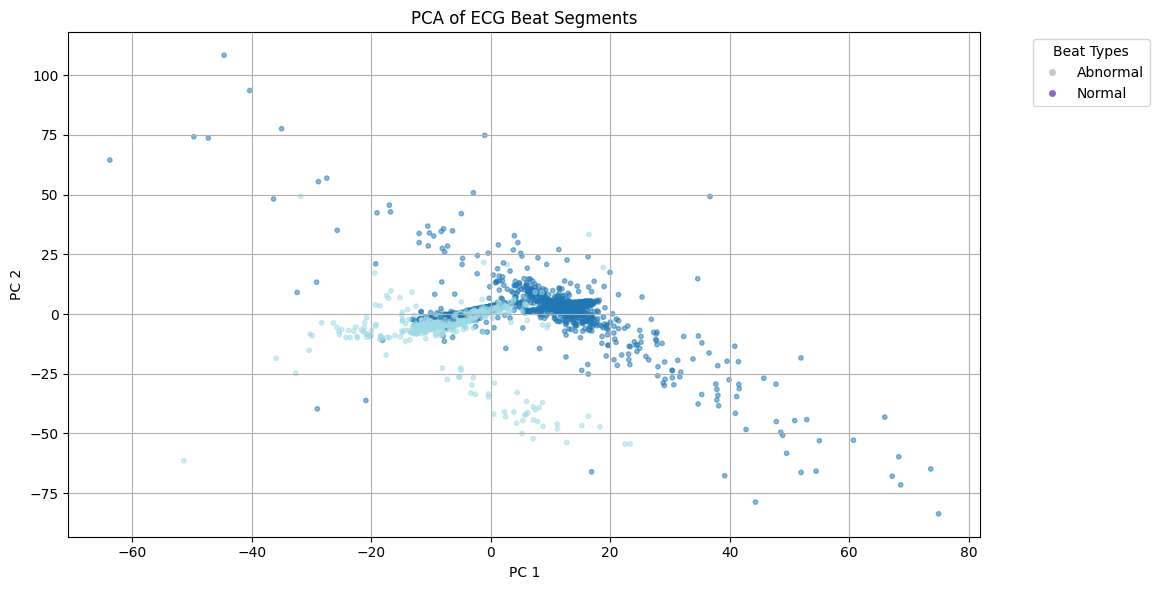

In [10]:
plot_pca_embedding(segments_filtered, labels, n_components =2)

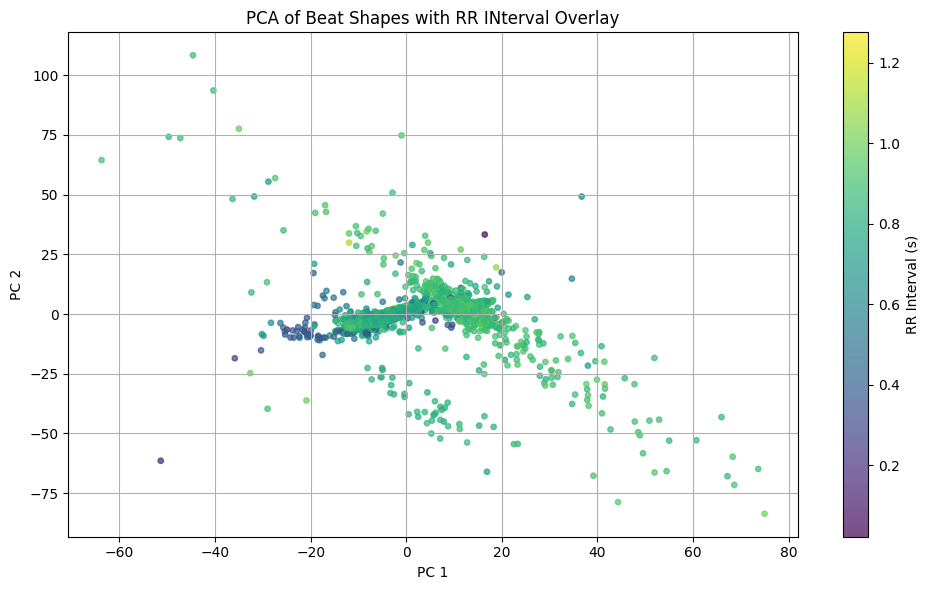

In [11]:
rr_intervals = df_filtered["rr_interval"].tolist()
plot_pca_with_rr_overlay(segments_filtered, rr_intervals)
